Text(0.5, 0, 'Age')

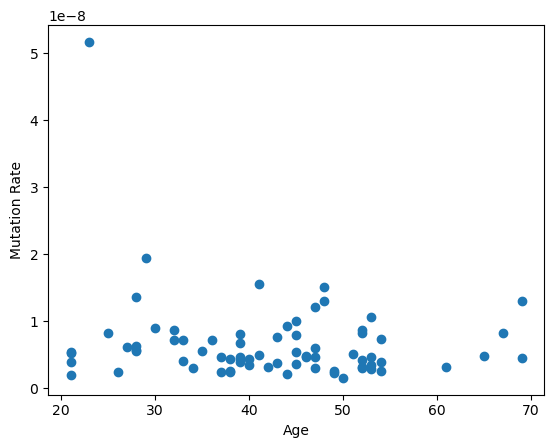

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ucsc.api as api

data = pd.read_csv("Randolph_chr20_donor_mutrate.tsv",sep = "\t")

plt.scatter(data=data,x="Age",y="MutRate")
plt.ylabel("Mutation Rate")
plt.xlabel("Age")

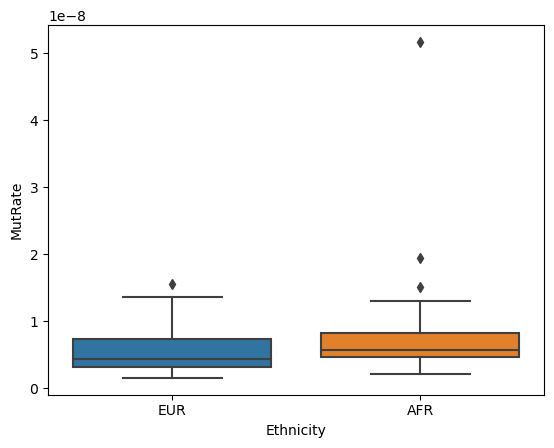

In [5]:
import seaborn as sns
import pandas as pd

file = pd.read_csv("Randolph_chr20_donor_mutrate.tsv",sep = "\t")

sns.boxplot(data=file, x="Ethnicity", y="MutRate")
plt.show()

In [5]:
#For this part, I use a file I manually filled out the Germline mutations with "Yes" mutations using dbSNP and Gene names, using the USCS genome browser
#I however did not write anything for non germline mutations or nucleotide positions without an ascribed poisition, leaving these cells empty

#THIS PROGRAM SECTION FILLS ALL EMPTY CELLS, THE NON GERMLINE BECOME "No" AND THE ROWS WITH NO KNOWN GENE BECOME "None"
import pandas as pd

muts = pd.read_csv("MutationsU1.tsv", sep = "\t", encoding_errors = "ignore")

mutsu = muts
mutsu.fillna(0,inplace=True)
mutsu.loc[mutsu["Germline"] == 0, "Germline"] = "No"
mutsu.loc[mutsu["Gene"] ==0, "Gene"] = "None"

mutsu.to_csv("MutationsUFinal.tsv", sep = "\t")

In [7]:
#REMOVES ALL GERMLINE "Yes" MUTATION ROWS FROM MATRIX IN NEW UPDATED MATRIX FILE

import pandas as pd

A = pd.read_csv("Randolph_chr20_mutationMatrix.tsv", sep = "\t")
B = pd.read_csv("MutationsUFinal.tsv", sep = "\t", encoding_errors = "ignore")

mutKeep = B.loc[B["Germline"] == "No", "Mutation"]
clearMut = A.loc[A["Mutation"].isin(mutKeep),:]

clearMut.to_csv("MutMatrixFiltered.tsv",sep="\t")

In [66]:
#Uses Filtered Matrix file and donor mutrate file

import pandas as pd

Matrix = pd.read_csv("MutMatrixFiltered.tsv", sep = "\t")
DM = pd.read_csv("Randolph_chr20_donor_mutrate.tsv",sep = "\t")

#Keep only the donor columns in matrix dataframe
matrix_remove = Matrix[Matrix.columns[2:]]

#get sum of mutations for each donor as mutSums
mutSums = matrix_remove.sum().reset_index(name ='Total')
mutSums.rename(columns = {'index':'Donor'}, inplace = True)

mutSums.to_csv("newsums.tsv",sep="\t")


#mutSums is a dataframe containing the Sum for each donor of the number of mutations found in the matrix

#merge the two dataframes, mutSums and DM. unused methods to merge in grey
#mergeDM = DM.merge(mutSums, left_on='Donor', right_on='index')
#merge = pd.merge(DM, mutSums, left_index=True, right_index=True)

#merges DM and mutSums with unique identifier which is the donor ID
merge = DM.merge(mutSums, on='Donor', how='outer')


merge.to_csv("MergedTable.tsv",sep = "\t")

#now need to update mutProps, which will be dividing the Sums column by the NCells column.
#Then to get MutRate, the MutProp gets divided by 64,444,167)

MutUpdated = merge

#set Nmuts column equal to the new Total column (now without Germline mutations)
MutUpdated["Nmuts"] = MutUpdated["Total"]
MutUpdated = MutUpdated.drop(['Total'],axis=1)

#now Nmuts is updated, now need to update MutProps and MutRate
MutUpdated


#i round here based on how the original mutrates were rounded
MutUpdated["MutProp"] = round(MutUpdated["Nmuts"]/MutUpdated["NCells"],16)

#here i am using the unrounded version of the mutprop to calculate mutrate, for reliability
MutUpdated["MutRate"] = (MutUpdated["Nmuts"]/MutUpdated["NCells"])/64444167

MutUpdated.to_csv("DonorMutsU1.tsv",sep = "\t")

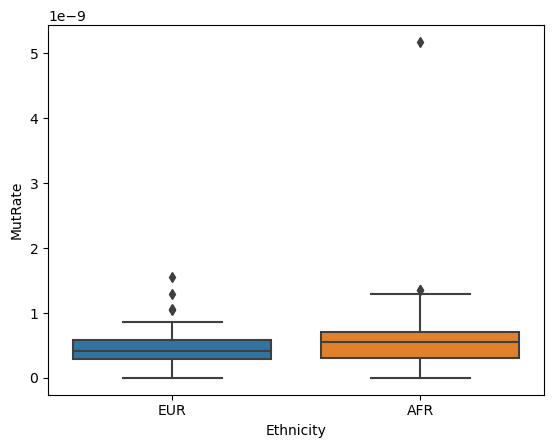

In [68]:
#now making new graphs to see if new relationship after germline mutations were removed
import seaborn as sns
import pandas as pd

file = pd.read_csv("DonorMutsU1.tsv",sep = "\t")

sns.boxplot(data=file, x="Ethnicity", y="MutRate")
plt.show()

Text(0.5, 0, 'Age')

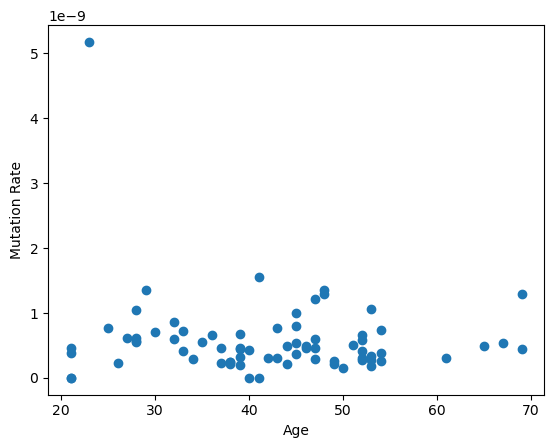

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("DonorMutsU1.tsv",sep = "\t")

plt.scatter(data=data,x="Age",y="MutRate")
plt.ylabel("Mutation Rate")
plt.xlabel("Age")

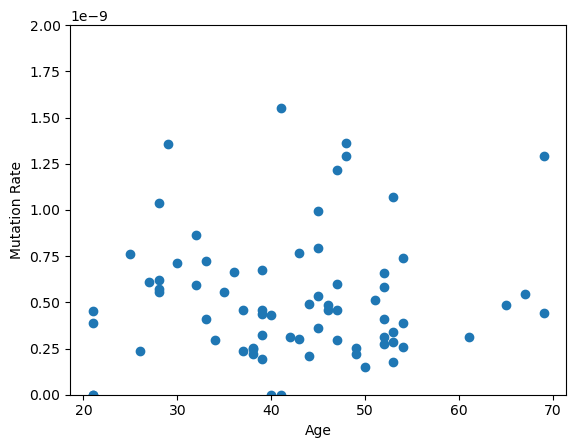

In [7]:
#first I removed the extreme point by using plt.ylim()
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("DonorMutsU1.tsv",sep = "\t")

plt.scatter(data=data,x="Age",y="MutRate")
plt.ylabel("Mutation Rate")
plt.xlabel("Age")
plt.ylim((0,0.000000002))
plt.savefig('Figure.png')

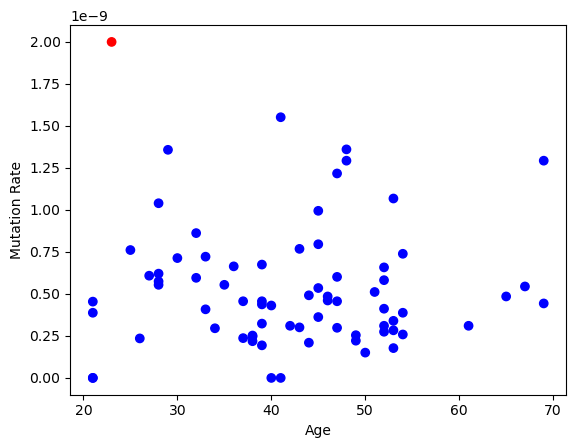

In [31]:
#This program is to instead of deleting the extreme value, it sets it equal to a y limit and colours it to show that it is an extreme datapoint

#THIS PROGRAM ADDS TWO NEW COLUMNS TO THE DATA FROM "DonorMutsU1.tsv"
#FIRST NEW COLUMN ADDED IS A DUPLICATE OF MutRate, WHERE THE VALUE HIGHER THAN THE LIMIT IS SET EQUAL TO LIMIT
#THEN NEW COLOUMN IS TO TO CALL THIS ROW "Outlier"
#THEN PLOT THE GRAPH AND COLOUR THE OUTLIER

import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("DonorMutsU1.tsv",sep = "\t")

#duplicates MutRate and sets it to maximum of y axis
data['RateDup'] = data.loc[:, 'MutRate']
data.loc[data["RateDup"] > 0.000000002 , "RateDup"] = 0.000000002


data['Outlier'] = ''

data.loc[data["RateDup"] == 0.000000002 , "Outlier"] = "Outlier"
data.loc[data["RateDup"] != 0.000000002 , "Outlier"] = "Original"
#data.to_csv("test1.tsv",sep="\t")


#adds colour based on condition
outlier = data["Outlier"]
colours = np.where(outlier == "Outlier", 'red', 'blue')
plt.scatter(data=data,x="Age",y="RateDup", c = colours )
plt.ylabel("Mutation Rate")
plt.xlabel("Age")
#plt.ylim((0,0.000000002))

plt.savefig('newFig.png')


#plt.scatter(data=data,x="Age",y="MutRate", c = )
#plt.ylabel("Mutation Rate")
#plt.xlabel("Age")
#plt.ylim((0,0.000000002))
#plt.savefig('Figure.png')

In [2]:
import pandas as pd

Matrix = pd.read_csv("MutMatrixFiltered.tsv", sep = "\t")
DM = pd.read_csv("DonorMutsU1.tsv",sep = "\t")

matrix_remove = Matrix[Matrix.columns[2:]]

mutSums = matrix_remove.sum().reset_index(name ='Total')
mutSums.rename(columns = {'index':'Donor'}, inplace = True)
mutSums.to_csv("newsums.tsv",sep="\t")

merge = DM.merge(mutSums, on='Donor', how='outer')

#merged table which is DM containing also the total for each donor
merge.to_csv("MergedTable.tsv",sep = "\t")






Text(0.5, 0, 'Age')

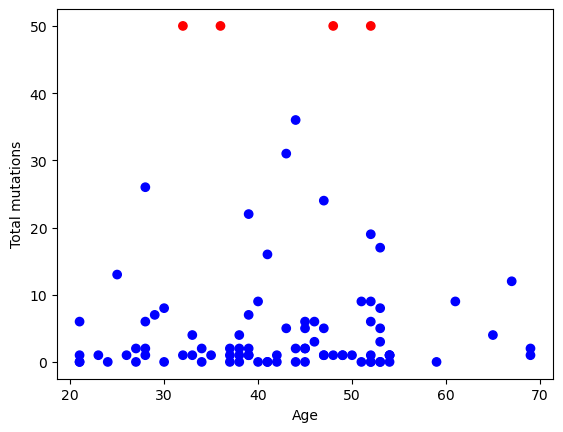

In [14]:
#TO COMPARE AGE WITH TOTAL MUTATIONS (EXCEPT WASNT DEVIDED BY NUM CELLS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


merge.loc[merge["Total"] > 50 , "Total"] = 50


colours = np.where(merge.Total == 50, 'red', 'blue')
plt.scatter(data=merge,x="Age",y="Total", c = colours )
plt.ylabel("Total mutations")
plt.xlabel("Age")

Text(0, 0.5, 'MutRate')

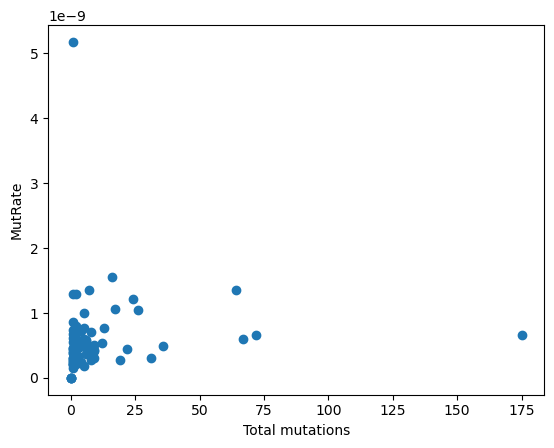

In [12]:
#COMPARE TOTAL MUTATIONS PER PERSON WITH MUTRATE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#this merged table is a merge of the updater donor mutation file (where the mutrate and mutprop where filtered
#to remove the germline mutations) and the updated matrix table sum (where germline mutations where removed)
#to access this file, need to run one of previous cells of code to create it
Matrix = pd.read_csv("MergedTable.tsv", sep = "\t")


plt.scatter(data=Matrix,x="Total",y="MutRate", )
plt.xlabel("Total mutations")
plt.ylabel("MutRate")

In [8]:
#FOLLOWING CELLS ARE ATTEMPTS TO USE THE USCS GENOME BROWSER REST API WRAPPER CREATED BY EYAD HAMZA
from ucsc.api import Track, Genome
v = Genome.find("hg38")

genome found


In [6]:
hg38 = Genome.find("hg38")


NameError: name 'Genome' is not defined

In [29]:
dbsnp = hg38.findTrackBy("longLabel", "dbSNP 155")

Exception: can't find track, Track does not exist

In [28]:
help(hg38.findTrackBy)

Help on method findTrackBy in module ucsc.api:

findTrackBy(attributeName, trackName) method of ucsc.api.Genome instance



In [ ]:
#className.get()  # Returns list of objects of the class

#className.find()  # Find object by name

#className.findBy()  # Find object by a specified attribute

#className.exists()  # Check to see if an object exists

In [22]:
from ucsc.api import Hub, Genome, Track, TrackSchema, Chromosome, Sequence  

help(Genome)


Help on class Genome in module ucsc.api:

class Genome(builtins.object)
 |  Genome(genomeName, **kwargs)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, genomeName, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  findTrack(self, trackName)
 |  
 |  findTrackBy(self, attributeName, trackName)
 |  
 |  isTrackExists(self, trackName)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  exists(genomeName)
 |  
 |  find(genomeName)
 |  
 |  findBy(genomeAttribute, value)
 |  
 |  get(hubUrl=None)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  tracks
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

In [2]:
from ucsc.api import Sequence 


# Get DNA sequence from specified chromosome in UCSC database genome -

sequence = Sequence.get(genome = 'hg38',chrom= 'chrM')

#print(sequence.dna)

# Get DNA sequence from specified chromosome and start,end coordinates in UCSC database genome -

sequence = Sequence.get(genome= 'hg38',chrom= 'chrM',start=4321,end=5678)

#print(sequence.dna)


In [27]:
from ucsc.api import Sequence 

help(Sequence.get)

Help on function get in module ucsc.api:

get(genome, chrom, hubUrl=None, start=None, end=None)



In [40]:
from ucsc.api import Sequence 



# Get DNA sequence from specified chromosome and start,end coordinates in UCSC database genome -
starts = 34000000-1
ende = 34000010


sequence = Sequence.get(genome= 'hg38',chrom= '20',start=starts,end=ends)

print(sequence.dna.upper())


NameError: name 'ends' is not defined